### Beginning EDA

In [1]:
# Imports
import os
import sys
import cv2
import time

import pandas as pd
import numpy as np



from IPython.display import Image

from pathlib import Path

In [2]:
!ls ../input

README.txt	       test_images  train_images
sample_submission.csv  TFERecords   train_split_train_images
test.csv	       train.csv    train_split_val_images


In [3]:
# Constants
HOME_DIR = Path('../input')
TRAIN_CSV_FN = HOME_DIR/'train.csv'
TEST_CSV_FN = HOME_DIR/'test.csv'
SAMPLE_SUBMISSION_FN = HOME_DIR/'sample_submission.csv'
TRAIN_IMAGES_DIR = HOME_DIR/'train_images'
TEST_IMAGES_DIR = HOME_DIR/'test_images'

In [4]:
# Read files
train_csv = pd.read_csv(TRAIN_CSV_FN)
test_csv = pd.read_csv(TEST_CSV_FN)
sample_submission_csv = pd.read_csv(SAMPLE_SUBMISSION_FN)

In [5]:
# Define the Id to animal mapping
id_to_animal = {0 : 'empty', 1 : 'deer', 2 : 'moose', 3 : 'squirrel', 4 : 'rodent', 5 : 'small_mammal', 
                6 : 'elk', 7 : 'pronghorn_antelope', 8 : 'rabbit', 9 : 'bighorn_sheep', 
                10 : 'fox', 11 : 'coyote', 12 : 'black_bear', 13 : 'raccoon', 14 : 'skunk', 
                15 : 'wolf', 16 : 'bobcat', 17 : 'cat', 18 : 'dog', 19 : 'opossum', 20 : 'bison', 
                21 : 'mountain_goat', 22 : 'mountain_lion',}

In [6]:
train_csv.head()

,category_id,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height
0,19,2011-05-13 23:43:18,5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg,1,5998cfa4-23d2-11e8-a6a3-ec086b02610b,33,Justin Brown,6f084ccc-5567-11e8-bc84-dca9047ef277,3,1024,747
1,19,2012-03-17 03:48:44,588a679f-23d2-11e8-a6a3-ec086b02610b.jpg,2,588a679f-23d2-11e8-a6a3-ec086b02610b,115,Justin Brown,6f12067d-5567-11e8-b3c0-dca9047ef277,3,1024,747
2,0,2014-05-11 11:56:46,59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg,1,59279ce3-23d2-11e8-a6a3-ec086b02610b,96,Erin Boydston,6faa92d1-5567-11e8-b1ae-dca9047ef277,1,1024,747
3,0,2013-10-06 02:00:00,5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg,1,5a2af4ab-23d2-11e8-a6a3-ec086b02610b,57,Erin Boydston,6f7d4702-5567-11e8-9e03-dca9047ef277,1,1024,747
4,0,2011-07-12 13:11:16,599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg,3,599fbd89-23d2-11e8-a6a3-ec086b02610b,46,Justin Brown,6f1728a1-5567-11e8-9be7-dca9047ef277,3,1024,747


In [7]:
train_csv.drop('category_id', axis=1)

,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height
0,2011-05-13 23:43:18,5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg,1,5998cfa4-23d2-11e8-a6a3-ec086b02610b,33,Justin Brown,6f084ccc-5567-11e8-bc84-dca9047ef277,3,1024,747
1,2012-03-17 03:48:44,588a679f-23d2-11e8-a6a3-ec086b02610b.jpg,2,588a679f-23d2-11e8-a6a3-ec086b02610b,115,Justin Brown,6f12067d-5567-11e8-b3c0-dca9047ef277,3,1024,747
2,2014-05-11 11:56:46,59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg,1,59279ce3-23d2-11e8-a6a3-ec086b02610b,96,Erin Boydston,6faa92d1-5567-11e8-b1ae-dca9047ef277,1,1024,747
3,2013-10-06 02:00:00,5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg,1,5a2af4ab-23d2-11e8-a6a3-ec086b02610b,57,Erin Boydston,6f7d4702-5567-11e8-9e03-dca9047ef277,1,1024,747
4,2011-07-12 13:11:16,599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg,3,599fbd89-23d2-11e8-a6a3-ec086b02610b,46,Justin Brown,6f1728a1-5567-11e8-9be7-dca9047ef277,3,1024,747
5,2011-06-28 15:29:42,593d68d7-23d2-11e8-a6a3-ec086b02610b.jpg,3,593d68d7-23d2-11e8-a6a3-ec086b02610b,90,Justin Brown,6f0f6778-5567-11e8-b5d2-dca9047ef277,3,1024,747
6,2012-01-05 07:41:39,59fae563-23d2-11e8-a6a3-ec086b02610b.jpg,3,59fae563-23d2-11e8-a6a3-ec086b02610b,46,Justin Brown,6f181999-5567-11e8-a472-dca9047ef277,3,1024,747
7,2014-07-31 14:00:00,58782b45-23d2-11e8-a6a3-ec086b02610b.jpg,1,58782b45-23d2-11e8-a6a3-ec086b02610b,106,Erin Boydston,6f789194-5567-11e8-946a-dca9047ef277,1,1024,747
8,2014-02-14 04:00:00,5911d8fd-23d2-11e8-a6a3-ec086b02610b.jpg,1,5911d8fd-23d2-11e8-a6a3-ec086b02610b,96,Erin Boydston,6f95e2d9-5567-11e8-8518-dca9047ef277,1,1024,747
9,2013-12-11 06:00:00,59292e5e-23d2-11e8-a6a3-ec086b02610b.jpg,1,59292e5e-23d2-11e8-a6a3-ec086b02610b,114,Erin Boydston,6ff7b897-5567-11e8-a26b-dca9047ef277,1,1024,747


In [8]:
train_csv.head().apply(lambda x: x)

,category_id,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height
0,19,2011-05-13 23:43:18,5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg,1,5998cfa4-23d2-11e8-a6a3-ec086b02610b,33,Justin Brown,6f084ccc-5567-11e8-bc84-dca9047ef277,3,1024,747
1,19,2012-03-17 03:48:44,588a679f-23d2-11e8-a6a3-ec086b02610b.jpg,2,588a679f-23d2-11e8-a6a3-ec086b02610b,115,Justin Brown,6f12067d-5567-11e8-b3c0-dca9047ef277,3,1024,747
2,0,2014-05-11 11:56:46,59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg,1,59279ce3-23d2-11e8-a6a3-ec086b02610b,96,Erin Boydston,6faa92d1-5567-11e8-b1ae-dca9047ef277,1,1024,747
3,0,2013-10-06 02:00:00,5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg,1,5a2af4ab-23d2-11e8-a6a3-ec086b02610b,57,Erin Boydston,6f7d4702-5567-11e8-9e03-dca9047ef277,1,1024,747
4,0,2011-07-12 13:11:16,599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg,3,599fbd89-23d2-11e8-a6a3-ec086b02610b,46,Justin Brown,6f1728a1-5567-11e8-9be7-dca9047ef277,3,1024,747


In [9]:
dim = train_csv.head()

In [20]:
dim.category_id.apply(lambda x: id_to_animal[x])

0    opossum
1    opossum
2      empty
3      empty
4      empty
Name: category_id, dtype: object

In [21]:
train_csv.category_id.to_list()

[19,
 19,
 0,
 0,
 0,
 3,
 8,
 0,
 0,
 0,
 0,
 0,
 4,
 13,
 19,
 19,
 0,
 13,
 1,
 11,
 0,
 19,
 0,
 13,
 0,
 0,
 8,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 0,
 11,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 13,
 0,
 11,
 0,
 0,
 0,
 0,
 13,
 0,
 0,
 0,
 0,
 0,
 19,
 0,
 3,
 0,
 0,
 1,
 16,
 16,
 0,
 0,
 16,
 17,
 0,
 0,
 0,
 19,
 19,
 0,
 8,
 0,
 0,
 0,
 0,
 0,
 11,
 0,
 0,
 0,
 3,
 13,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 19,
 0,
 0,
 0,
 0,
 0,
 0,
 11,
 0,
 4,
 0,
 19,
 11,
 0,
 0,
 19,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 8,
 13,
 0,
 8,
 0,
 0,
 0,
 8,
 0,
 0,
 0,
 17,
 0,
 19,
 19,
 8,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 19,
 0,
 13,
 0,
 0,
 0,
 0,
 0,
 17,
 0,
 17,
 19,
 8,
 19,
 0,
 19,
 13,
 0,
 0,
 0,
 0,
 0,
 0,
 13,
 14,
 0,
 0,
 8,
 0,
 0,
 8,
 18,
 0,
 0,
 19,
 0,
 1,
 0,
 0,
 11,
 3,
 13,
 0,
 19,
 0,
 0,
 0,
 13,
 17,
 0,
 0,
 0,
 18,
 1,
 0,
 0,
 0,
 0,
 0,
 17,
 0,
 0,
 0,
 0,
 0,
 11,
 11,
 4,
 0,
 0,
 0,
 0,
 13,
 0,
 0,
 1,
 17,
 0,
 0,
 0,
 0,
 0,
 13,
 0,
 0,
 1,
 19,
 0,
 0,
 0,


In [25]:
dim.file_name.apply(lambda x: HOME_DIR/x)

0    ../input/5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg
1    ../input/588a679f-23d2-11e8-a6a3-ec086b02610b.jpg
2    ../input/59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg
3    ../input/5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg
4    ../input/599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg
Name: file_name, dtype: object

In [6]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196299 entries, 0 to 196298
Data columns (total 11 columns):
category_id       196299 non-null int64
date_captured     196299 non-null object
file_name         196299 non-null object
frame_num         196299 non-null int64
id                196299 non-null object
location          196299 non-null int64
rights_holder     196299 non-null object
seq_id            196299 non-null object
seq_num_frames    196299 non-null int64
width             196299 non-null int64
height            196299 non-null int64
dtypes: int64(6), object(5)
memory usage: 16.5+ MB


In [7]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153730 entries, 0 to 153729
Data columns (total 10 columns):
date_captured     153730 non-null object
file_name         153730 non-null object
frame_num         153730 non-null int64
id                153730 non-null object
location          153730 non-null int64
rights_holder     153730 non-null object
seq_id            153730 non-null object
seq_num_frames    153730 non-null int64
width             153730 non-null int64
height            153730 non-null int64
dtypes: int64(5), object(5)
memory usage: 11.7+ MB


In [8]:
sample_submission_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153730 entries, 0 to 153729
Data columns (total 2 columns):
Id           153730 non-null object
Predicted    153730 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [9]:
train_csv.head()

,category_id,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height
0,19,2011-05-13 23:43:18,5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg,1,5998cfa4-23d2-11e8-a6a3-ec086b02610b,33,Justin Brown,6f084ccc-5567-11e8-bc84-dca9047ef277,3,1024,747
1,19,2012-03-17 03:48:44,588a679f-23d2-11e8-a6a3-ec086b02610b.jpg,2,588a679f-23d2-11e8-a6a3-ec086b02610b,115,Justin Brown,6f12067d-5567-11e8-b3c0-dca9047ef277,3,1024,747
2,0,2014-05-11 11:56:46,59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg,1,59279ce3-23d2-11e8-a6a3-ec086b02610b,96,Erin Boydston,6faa92d1-5567-11e8-b1ae-dca9047ef277,1,1024,747
3,0,2013-10-06 02:00:00,5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg,1,5a2af4ab-23d2-11e8-a6a3-ec086b02610b,57,Erin Boydston,6f7d4702-5567-11e8-9e03-dca9047ef277,1,1024,747
4,0,2011-07-12 13:11:16,599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg,3,599fbd89-23d2-11e8-a6a3-ec086b02610b,46,Justin Brown,6f1728a1-5567-11e8-9be7-dca9047ef277,3,1024,747


In [10]:
train_csv.iloc[36]

category_id                                             11
date_captured                          2011-05-14 04:16:52
file_name         5a2e13b9-23d2-11e8-a6a3-ec086b02610b.jpg
frame_num                                                3
id                    5a2e13b9-23d2-11e8-a6a3-ec086b02610b
location                                                40
rights_holder                                 Justin Brown
seq_id                6f05c2ae-5567-11e8-a9a6-dca9047ef277
seq_num_frames                                           3
width                                                 1024
height                                                 747
Name: 36, dtype: object

In [11]:
category_id=11
train_csv[train_csv.category_id==category_id].index[0:10]

Int64Index([19, 36, 50, 85, 105, 110, 185, 211, 212, 236], dtype='int64')

category id: 11, Animal name: coyote


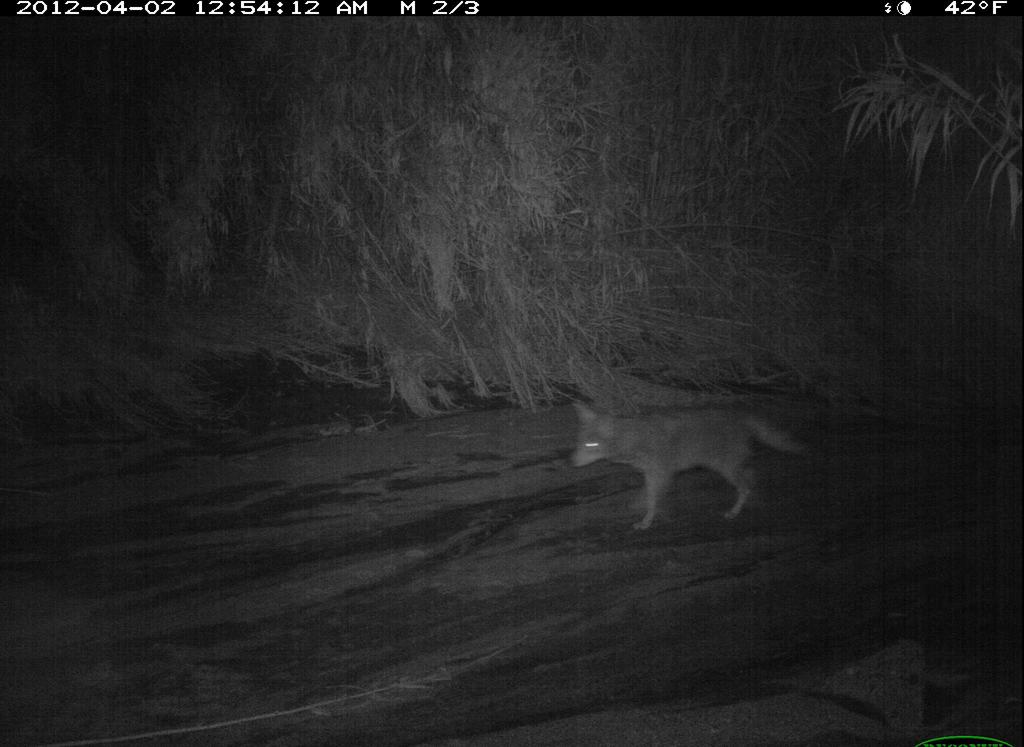

In [12]:
row_idx = 236
fn = train_csv.iloc[row_idx].file_name
animal_id = train_csv.iloc[row_idx].category_id
animal_name = id_to_animal[animal_id]
ffn = f'../input/train_images/{fn}'
print(f'category id: {animal_id}, Animal name: {animal_name}')
Image(filename=ffn) 


In [13]:
test_csv.head()

,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height
0,2016-01-03 11:30:56,bce932f6-2bf6-11e9-bcad-06f10d5896c4.jpg,1,bce932f6-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ac61c-2e32-11e9-90ef-dca9047ef277,5,1024,726
1,2016-01-03 11:30:57,bce932f7-2bf6-11e9-bcad-06f10d5896c4.jpg,2,bce932f7-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ac61c-2e32-11e9-90ef-dca9047ef277,5,1024,726
2,2016-01-03 11:30:58,bce932f8-2bf6-11e9-bcad-06f10d5896c4.jpg,3,bce932f8-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ac61c-2e32-11e9-90ef-dca9047ef277,5,1024,726
3,2016-01-03 11:30:59,bce932f9-2bf6-11e9-bcad-06f10d5896c4.jpg,4,bce932f9-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ac61c-2e32-11e9-90ef-dca9047ef277,5,1024,726
4,2016-01-03 11:31:00,bce932fa-2bf6-11e9-bcad-06f10d5896c4.jpg,5,bce932fa-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ac61c-2e32-11e9-90ef-dca9047ef277,5,1024,726


Animal id: 11


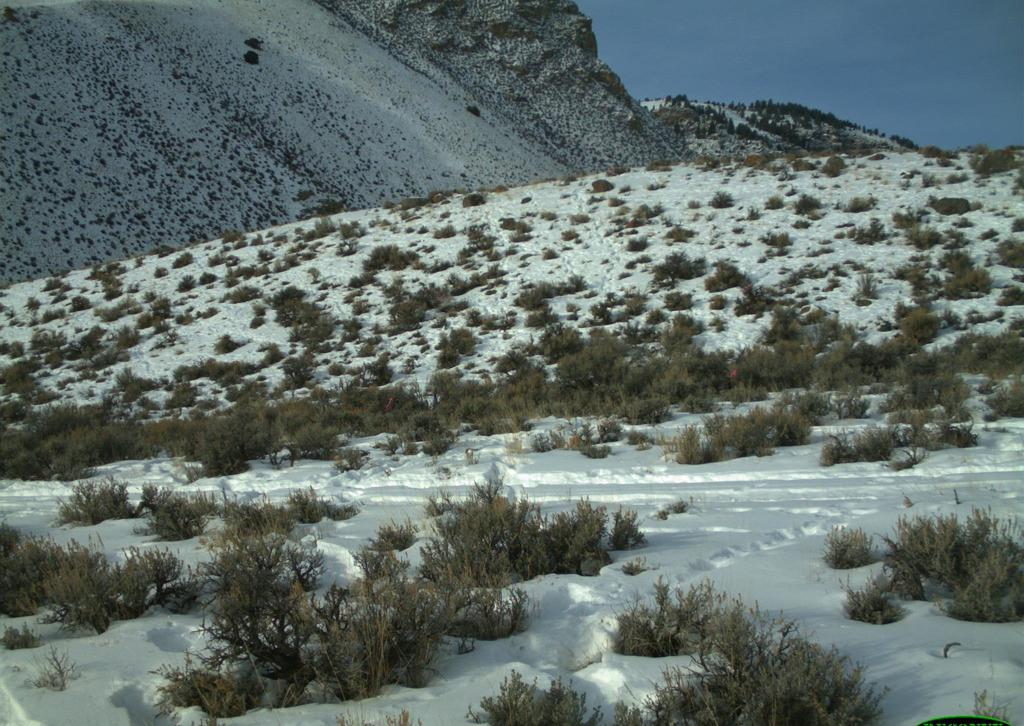

In [14]:
row_idx = 50
fn = test_csv.iloc[row_idx].file_name
ffn = f'../input/test_images/{fn}'
print(f'Animal id: {animal_id}')
Image(filename=ffn)


In [15]:
sample_submission_csv.head()

,Id,Predicted
0,b005e5b2-2c0b-11e9-bcad-06f10d5896c4,0
1,f2347cfe-2c11-11e9-bcad-06f10d5896c4,0
2,27cf8d26-2c0e-11e9-bcad-06f10d5896c4,0
3,f82f52c7-2c1d-11e9-bcad-06f10d5896c4,0
4,e133f50d-2c1c-11e9-bcad-06f10d5896c4,0


In [16]:
len(train_csv.columns), len(test_csv.columns)

(11, 10)

In [17]:
train_csv.frame_num.unique()

array([1, 2, 3, 4, 5])

In [18]:
test_csv.frame_num.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

#### This is a bit strange
- In train, the frame num ranges from 1 to 5
- In test, frame_num ranges from 1 to 95

In [19]:
train_csv.rights_holder.unique()

array(['Justin Brown', 'Erin Boydston'], dtype=object)

In [20]:
test_csv.rights_holder.unique()

array(['Idaho Department of Fish and Game'], dtype=object)

#### Perhaps this "strangeness" could be explained from the train and test data is from different places

In [21]:
train_loc_uniq=train_csv.location.unique()
test_loc_uniq=test_csv.location.unique()
train_loc_uniq.sort()
test_loc_uniq.sort()

In [22]:
len(train_loc_uniq), len(test_loc_uniq)

(138, 100)

#### In train, there are 138 unique locations. In test there is 100

In [23]:
ffn

'../input/test_images/bf25c980-2bf6-11e9-bcad-06f10d5896c4.jpg'

In [34]:
row_idx = 876
fn = train_csv.iloc[row_idx].file_name
animal_id = train_csv.iloc[row_idx].category_id
animal_name = id_to_animal[animal_id]
ffn = f'../input/train_images/{fn}'
cv2_img = cv2.imread(ffn)

In [35]:
cv2_img.shape

(747, 1024, 3)

In [ ]:
row_idx = 1000
fn = test_csv.iloc[row_idx].file_name

ffn = f'../input/test_images/{fn}'
cv2_img = cv2.imread(ffn)

In [42]:
cv2_img.shape

(726, 1024, 3)